Readers:
Sorry, this is a bit of a trainwreck. I tried to be clever with linear algebra, failed to do so, tried to be clever to try/except statements, failed to do that, and ended up at the naive solution anyway. :))))))

In [18]:
import string
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import gif
from aocd import submit

In [230]:
try:
    with open("input") as f:
        data = f.read()
    print("data read successfully")
except:
    from aocd import data
    f = open("input", "w")
    f.write(data)
    print("data imported and written successfully")


data read successfully


# 10
If we need to process the data in other ways (cast to ints/floats, split on \n\n, etc), do so here:

In [231]:
data = data.replace("L", "1").replace(".", "0").split("\n")

In [4]:
HEIGHT = len(data)
WIDTH = len(data[0])

In [5]:
seatmap = np.zeros([HEIGHT + 2, WIDTH + 2], dtype="complex")

In [6]:
seatmap[1:-1, 1:-1] = np.array([[int(_) for _ in list(row)] for row in data])
original = seatmap.copy()

In [13]:
def convolution(y, x, array):
    total = np.sum(array[y-1:y+2, x-1:x+2]) - array[y,x]
    if array[y,x] == 1 and np.imag(total) == 0 :
        return 1j
    elif array[y,x] == 1j and np.imag(total) >= 4:
        return 1
    else:
        return array[y,x]

<ipython-input-14-92de39aaf12f>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(seatmap*seatmap,float),cmap="coolwarm", vmin=-1, vmax=1)


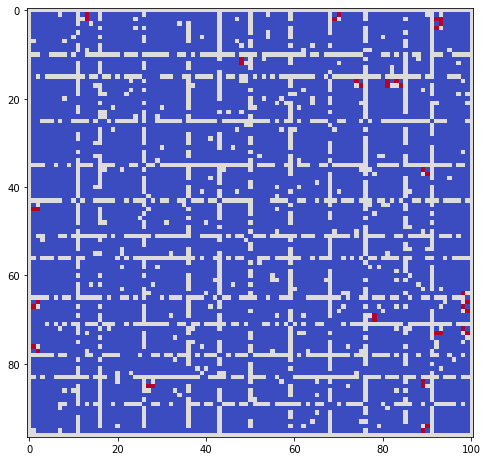

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(np.array(seatmap*seatmap,float),cmap="coolwarm", vmin=-1, vmax=1)

In [19]:
@gif.frame
def plot(c_array):
    plt.title("Iteration: " + str(iteration))
    plt.imshow(np.array(c_array*c_array,float),cmap="coolwarm", vmin=-1, vmax=1)

In [28]:
gif.options.matplotlib["dpi"] = 300
changing = True
iteration = 0
frames = []
seatmap = original.copy()
while changing:
    frame = plot(seatmap)
    frames.append(frame)
    print(changing, iteration, seatmap.sum())
    new_map = np.zeros([HEIGHT + 2, WIDTH + 2], dtype="complex")
    for y in range(HEIGHT):
        for x in range(WIDTH):
            new_map[y+1, x+1] = convolution(y+1, x+1, seatmap)
    if np.array_equal(new_map, seatmap):
        print("NOTHING CHANGED")
        changing = False
    seatmap = new_map.copy()
    iteration += 1

<ipython-input-19-666e81926352>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(c_array*c_array,float),cmap="coolwarm", vmin=-1, vmax=1)


True 0 (7751+0j)
True 1 7751j
True 2 (7602+149j)
True 3 (405+7346j)
True 4 (7426+325j)
True 5 (891+6860j)
True 6 (7269+482j)
True 7 (1290+6461j)
True 8 (7130+621j)
True 9 (1635+6116j)
True 10 (7001+750j)
True 11 (1936+5815j)
True 12 (6867+884j)
True 13 (2250+5501j)
True 14 (6720+1031j)
True 15 (2573+5178j)
True 16 (6584+1167j)
True 17 (2860+4891j)
True 18 (6462+1289j)
True 19 (3103+4648j)
True 20 (6356+1395j)
True 21 (3298+4453j)
True 22 (6262+1489j)
True 23 (3458+4293j)
True 24 (6193+1558j)
True 25 (3595+4156j)
True 26 (6134+1617j)
True 27 (3693+4058j)
True 28 (6086+1665j)
True 29 (3782+3969j)
True 30 (6049+1702j)
True 31 (3863+3888j)
True 32 (6010+1741j)
True 33 (3944+3807j)
True 34 (5974+1777j)
True 35 (4015+3736j)
True 36 (5942+1809j)
True 37 (4085+3666j)
True 38 (5907+1844j)
True 39 (4154+3597j)
True 40 (5871+1880j)
True 41 (4221+3530j)
True 42 (5828+1923j)
True 43 (4303+3448j)
True 44 (5791+1960j)
True 45 (4377+3374j)
True 46 (5757+1994j)
True 47 (4444+3307j)
True 48 (5729+2022j)

In [29]:
gif.save(frames, "evo.gif",duration=.05, unit="s")

In [30]:
seatmap.sum()

(5313+2438j)

In [ ]:
submit(answer_a, part="a", day=11, year=2020)

# Part II

In [414]:
# returns the number of cardinal directions that contain an occupied seat
def get_diagonals(y,x, array):
    h = array.shape[0]
    w = array.shape[1]
    total = 0
        
    # N
    N = 0
    for i in array[0:y,x][::-1]:
        if i == 1:
            break
        elif i == 1j:
            N += 1
            break
    
    # S
    S = 0
    for i in array[y+1:,x]:
        if i == 1:
            break
        elif i == 1j:
            S += 1
            break
    # WEST
    W = 0
    for i in array[y,0:x][::-1]:
        if i == 1:
            break
        elif i == 1j:
            W += 1
            break
            

    # EAST
    E = 0
    for i in array[y,x+1:]:
        if i == 1:
            break
        elif i == 1j:
            E += 1
            break
    # Diagonals (using cardinal directions)
    #NW
    inc = 1
    NW = 0
    x_n = x - inc
    y_n = y - inc
    in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    while in_bounds:
        target = array[y_n, x_n]
        if target == 1:
            break
        elif target == 1j:
            NW += 1
            break
            
        inc += 1
        x_n = x - inc
        y_n = y - inc
        in_bounds = (0 <= y_n < h and 0 <= x_n < w)
            
    #NE
    inc = 1
    NE = 0
    x_n = x + inc
    y_n = y - inc
    in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    while in_bounds:
        target = array[y_n, x_n]
        if target == 1:
            break
        elif target == 1j:
            NE += 1
            break
            
        inc += 1
        x_n = x + inc
        y_n = y - inc
        in_bounds = (0 <= y_n < h and 0 <= x_n < w)
        
    #SE
    inc = 1
    SE = 0
    x_n = x + inc
    y_n = y + inc
    in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    while in_bounds:
        target = array[y_n, x_n]
        if target == 1:
            break
        elif target == 1j:
            SE += 1
            break
            
        inc += 1
        x_n = x + inc
        y_n = y + inc
        in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    #SW
    inc = 1
    SW = 0
    x_n = x - inc
    y_n = y + inc
    in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    while in_bounds:
        target = array[y_n, x_n]
        if target == 1:
            break
        elif target == 1j:
            SW += 1
            break
            
        inc += 1
        x_n = x - inc
        y_n = y + inc
        in_bounds = (0 <= y_n < h and 0 <= x_n < w)
    # diagonal
#     k = x - y
#     diag = np.diagonal(array,k)
    
#     #UL
#     ul = 0
#     for i in diag[:y][::-1]:
#         if i == 1:
#             break
#         elif i == 1j:
#             ul += 1
#             break
            
#     # DR
#     dr = 0
#     for i in diag[y+1:]:
#         if i == 1:
#             break
#         elif i == 1j:
#             dr += 1
#             break
    
#     # anti-diagonal
#     adiag = np.fliplr(array).diagonal(len(array[0]) - x - y - 1)
#     #UR
#     ur = 0
#     for i in adiag[:y][::-1]:
#         if i == 1:
#             break
#         elif i == 1j:
#             ur += 1
#             break
#     #DL
#     dl = 0
#     for i in adiag[y+1:]:
#         if i == 1:
#             break
#         elif i == 1j:
#             dl += 1
#             break
        
#     print([[ul, up, ur],[left, 0, right], [dl, down, dr]])
#     np.array([[ul, up, ur],[left, 0, right], [dl, down, dr]])
#     return sum(np.array([[ul, up, ur],[left, 0, right], [dl, down, dr]]))
#         print(np.array([[NW, N, NE],[W,0,E],[SW,S,SE]]))
#     if x == 1 and y ==1:
#         print(np.array([[NW, N, NE],[W,0,E],[SW,S,SE]]))
    return N + E + S + W + NE + SE + SW + NW


def fancy_convolution(y, x, array):
    diags = get_diagonals(y,x,array)
    if array[y,x] == 1 and diags == 0 :
        return 1j
    elif array[y,x] == 1j and diags >= 5:
        return 1 + 0j
    else:
        return array[y,x]

@gif.frame
def plot(c_array):
    plt.title("Iteration: " + str(iteration))
    plt.imshow(np.array(c_array*c_array,float),cmap="coolwarm", vmin=-1, vmax=1)
#     plt.plot([0, 10], [1, 11])
#     plt.plot([0,3], [3, 0])

In [415]:
test_string = """L.LL.LL.LL
LLLLLLL.LL
L.L.L..L..
LLLL.LL.LL
L.LL.LL.LL
L.LLLLL.LL
..L.L.....
LLLLLLLLLL
L.LLLLLL.L
L.LLLLL.LL"""

test = test_string.replace("L", "1").replace(".", "0").split("\n")
testmap = np.zeros([len(test) + 2, len(test[0]) + 2], dtype="complex")
testmap[1:-1, 1:-1] = np.array([[int(_) for _ in list(row)] for row in test])
testmap = np.array([[int(_) for _ in list(row)] for row in test])

In [416]:
testmap

array([[1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]])

In [417]:
gif.options.matplotlib["dpi"] = 300
changing = True
iteration = 0
frames = []
seatmap = original.copy()
while changing:
    frame = plot(seatmap)
    frames.append(frame)
    print("Iteration: ", iteration, seatmap.sum())
    new_map = np.zeros(seatmap.shape, dtype="complex")
    for y in range(seatmap.shape[0]):
        for x in range(seatmap.shape[1]):
            new_map[y, x] = fancy_convolution(y, x, seatmap)
    if np.array_equal(new_map, seatmap):
        print("NOTHING CHANGED")
        changing = False
    seatmap = new_map.copy()
    iteration += 1

<ipython-input-414-bdc74d4e50fa>:179: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(c_array*c_array,float),cmap="coolwarm", vmin=-1, vmax=1)


Iteration:  0 (7751+0j)
Iteration:  1 7751j
Iteration:  2 (7746+5j)
Iteration:  3 (14+7737j)
Iteration:  4 (7738+13j)
Iteration:  5 (38+7713j)
Iteration:  6 (7726+25j)
Iteration:  7 (74+7677j)
Iteration:  8 (7710+41j)
Iteration:  9 (126+7625j)
Iteration:  10 (7689+62j)
Iteration:  11 (187+7564j)
Iteration:  12 (7663+88j)
Iteration:  13 (260+7491j)
Iteration:  14 (7631+120j)
Iteration:  15 (345+7406j)
Iteration:  16 (7597+154j)
Iteration:  17 (436+7315j)
Iteration:  18 (7556+195j)
Iteration:  19 (538+7213j)
Iteration:  20 (7512+239j)
Iteration:  21 (659+7092j)
Iteration:  22 (7466+285j)
Iteration:  23 (783+6968j)
Iteration:  24 (7418+333j)
Iteration:  25 (922+6829j)
Iteration:  26 (7363+388j)
Iteration:  27 (1077+6674j)
Iteration:  28 (7298+453j)
Iteration:  29 (1250+6501j)
Iteration:  30 (7230+521j)
Iteration:  31 (1441+6310j)
Iteration:  32 (7161+590j)
Iteration:  33 (1639+6112j)
Iteration:  34 (7084+667j)
Iteration:  35 (1846+5905j)
Iteration:  36 (7007+744j)
Iteration:  37 (2051+570

In [419]:
gif.save(frames, "evo2.gif",duration=0.1, unit="s")

In [68]:
submit(2174, part="b", day=11, year=2020)

wrong answer: 2844


That's not the right answer; your answer is too high.  If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit.  Please wait one minute before trying again. (You guessed 2844.) [Return to Day 11]


<Response [200]>

# Pen and paper
For a matrix $M$, at index $(i,j)$, find:
1. The diagonal and anti-diagonal
2. The partitions of each

## 1a. Diagonal
The diagonal consists of all terms
$M_{a,a+k}$, where $k$ is the diagonal $k = x -y$, and $a$ runs from  
## 2. What is the relationship between the offset $k$, the indices $(i,j)$, and the splitting point $s$?